In [1]:
using LinearAlgebra
using Plots

In [113]:
a = 1
b = -(11/7)

x(t) = (a+b) * cos(t) + b * cos(((a+b)/b)*t)
y(t) = (a+b) * sin(t) + b * sin(((a+b)/b)*t)

#pretvorimo v polarni zapis, da lahko integriramo po kotu

polar_a(t) = atan(y(t),x(t))+pi
polar_a2(t) = atan(-x(t),y(t))+3pi/2
polar_d(t) = sqrt(x(t)^2+y(t)^2)

#maxval = lcm(a,b)
b

-1.5714285714285714

$\sum{bruh}$

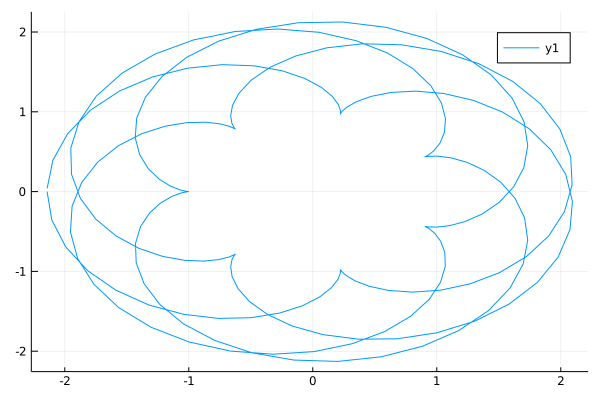

In [3]:
plot(x,y,0:0.314:22pi)

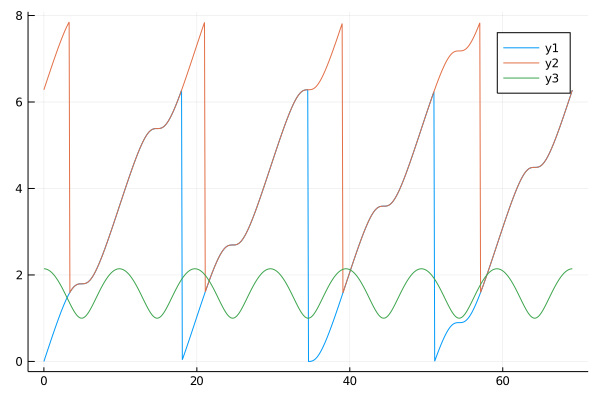

In [114]:
#iteracijske metode ne delujejo za nezvezne funkcije, zato uporabimo drugo funkcijo, ki je zvezna na drugačnem intervalu

plot(polar_a,0:0.1:22pi)
plot!(polar_a2,0:0.1:22pi)
plot!(polar_d,0:0.1:22pi)

In [66]:
#sekantna metoda, da ne potrebujemo odvoda

function sekantna(f, x1, x2, maxit=1000, tol = 1e-5)
      
    x = 0
    
    for i=1:maxit
        fx1 = f(x1)
        fx2 = f(x2)
        
        step = (fx2 * (x2-x1))/(fx2-fx1)
        
        step = clamp(step,-0.1,0.1)
        
        x = x2 - step
        
        #display(fx1)
        #display(fx2)
        #display(x)
        #display(abs(f(x)))
        #display("-------")
        
        x1 = x2
        x2 = x #0.9*x2+0.1*x
        
        if abs(f(x)) < tol
            return x,i
        end
        
    end
    
    return x,maxit
        
end

sekantna (generic function with 3 methods)

In [74]:
#func(x) = cos(x)-0.5
func(t) = polar_a(t)#-0.0001

sekantna(func,0.0,0.1)

(0.0, 1)

In [75]:
xs = []

for i=0:0.1:22pi
    x1,it = sekantna(func,i,i+0.1)
    #if x1 > 0 && x1 < 22pi
    xs = vcat(xs,x1)
    #end
end



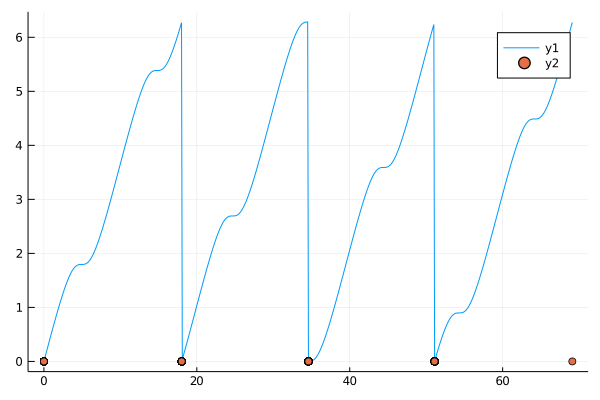

In [76]:
plot(func,0:0.1:22pi)
scatter!(xs,zeros(size(xs)))

In [512]:
ts = []

t1 = 0
t2 = 0.1

numdots = 2048*2

#celotna funkcija je "dolga" 8pi, po katerem se ponavlja. Korakamo po enakomernih kotih, in računamo vrednosti t za te kote

for i=pi/numdots:pi/numdots:8pi

    #display(i%2pi)
    #display((i-pi/2)%2pi+pi/2)
    
    i2 = (i-pi/2)%2pi+pi/2
    #display(i)
    #display(i2)
    
    func1(t) = polar_a(t)-i%2pi+0.01
    func2(t) = polar_a2(t)-i2+0.01
  
    if polar_a(t2) < pi
        t,it = sekantna(func1,t1,t2)
    else
        t,it = sekantna(func2,t1,t2)
    end
    
    
    #display(polar_a(t))
    #display("-----------------")
    t1 = t2
    t2 = t
    
    ts = vcat(ts,t)
end

In [481]:
plot(func,0:0.1:22pi)
scatter!(ts,polar_a.(ts))

In [513]:
#imamo 4 obhode krožnice. Le pri vsakem kotu vzamemo tisto vrednost t, ki je najbolj oddaljena od središča, dobimo zunanjo krožnjico, ki jo želimo integrirati.

tsmat = Matrix(reshape(ts,:,4))
tsrad = Matrix(polar_d.(tsmat))

maxids = [findmax(tsrad[i,:])[2] for i=1:size(tsrad)[1]]

maxts = [tsmat[i,maxids[i]] for i=1:size(tsmat)[1]]

maxts = vcat(maxts,maxts[1])

#maxts = maxts[1:10]

8193-element Array{Float64,1}:
  0.0021424199230381732 
  0.003220806872528454  
  0.0025895441719986615 
 -0.00032225351739241515
 -0.011559475223079593  
 -0.010121364634062201  
 -0.008683254968087582  
 -0.0072451460939998    
 -0.005807037880631492  
 -0.004368930196860451  
 -0.0029308229115179952 
 -0.0014927158934572166 
 -5.460901152129819e-5  
  ⋮                     
 -0.0331313340172193    
 -0.03169319384200236   
 -0.03025505655751716   
 -0.028816922032585048  
 -0.027378790135981497  
 -0.025940660736507696  
 -0.024502533702972187  
 -0.023064408904164193  
 -0.021626286208930177  
 -0.020188165486068898  
 -0.018750046604409643  
  0.0021424199230381732 

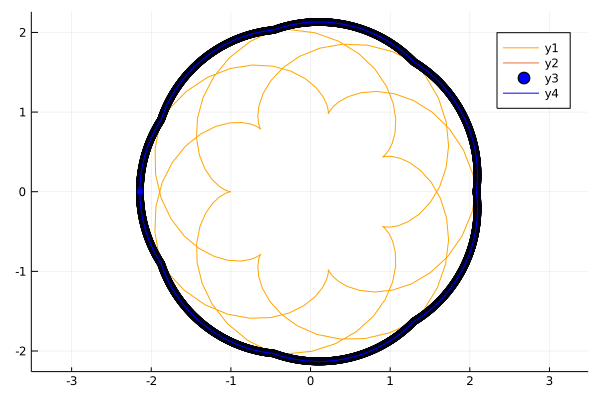

In [483]:
plot(x,y,0:0.314:22pi, color="orange", axisratio=:equal)
plot!(i->2.123*sin(i),i->2.123*cos(i),0:0.314/2:2pi)
scatter!(x,y,maxts,color="blue")
plot!(x,y,maxts,color="blue")

In [484]:
function sredinski(a,b,n)
    h = (b-a)/n
    utezi = h*ones(n)
    vozli = LinRange(a,b,n)
    return utezi,vozli
end
function integral_sredinski(vals,a,b,n)
    w,x = sredinski(a,b,n)
    return dot(w,vals)
end

function simpson(a,b,n)
    
    n = floor(Int,n/2)
    
    h = (b-a)/n
    vozli = LinRange(a,b,2n+1)
    utezi = h/6 * vcat([1],repeat([4,2],n-1),[4,1])
    
    return utezi, vozli
end

function integral_simpson(vals,a,b,n)
    w,x = simpson(a,b,n)
    return dot(w,vals)
end

integral_simpson (generic function with 1 method)

In [485]:
w,z = sredinski(0,pi,size(vals)[1])
size(w)

(513,)

In [486]:
w,z = simpson(0,pi,size(vals)[1])

size(w)

(513,)

In [487]:
polar_uniform(t,v) = v*v

polar_uniform (generic function with 2 methods)

In [514]:
#integriramo čez dele kroga, torej je enačba pi*r^2. Pi lahko izpostavimo, torej integriramo od 0 do pi, razdalje pa moramo kvadrirati
vals = polar_d.(maxts)
vals = vals.*vals
integral_sredinski(vals,0,pi,size(vals)[1])

14.15823041696632

In [495]:
integral_simpson(vals,0,pi,size(vals)[1])

14.15819769694051

In [515]:
integral_simpson(vals,0,pi,size(vals)[1])

14.158197769534423

In [505]:
pi*(0.17^2)

0.09079202768874504

In [506]:
#test na enakomernem krogu

integral_simpson(polar_uniform.(maxts,0.17),0,pi,size(vals)[1])

0.09079202768874503

257-element Array{Float64,1}:
  0.02727142842866459
  0.07329355383262831
  0.1193139098119584 
  0.16534977928203515
  0.21140113526538762
  0.257492232766217  
  0.30359211940899644
  0.3497207758712168 
  0.39588273163791776
  0.442082587863882  
  0.4883250279510742 
  0.5346148285755716 
  0.5809568712269404 
  ⋮                  
 68.63527744266328   
 68.68151165103305   
 68.72770414815558   
 68.77385960145469   
 68.81998259808685   
 68.86607765544552   
 68.91214923129148   
 68.95820173356742   
 69.00425423730351   
 69.05027732298875   
 69.09629438113137   
  0.02727142842866459